In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt


df_post = pd.read_csv('/content/posts.csv')
print("Completed loading post.csv")

df_user = pd.read_csv('/content/users.csv')
print("Completed loading user.csv")

df_ph = pd.read_csv('/content/post_history.csv')
print("Completed loading df_ph.csv {}".format(df_ph.shape[0]))
print("After cleaning the ph data frame {}".format(df_ph.shape[0]))

df_votes= pd.read_csv('/content/votes.csv')
print("Completed loading votes.csv")

Completed loading post.csv
Completed loading user.csv
Completed loading df_ph.csv 3904898
After cleaning the ph data frame 3904898
Completed loading votes.csv


In [ ]:
#set the datetime
print("user data types\n {}".format(df_user.dtypes))
print("post data types\n {}".format(df_post.dtypes))
print("ph data types\n {}".format(df_ph.dtypes))
print("vote data types\n {}".format(df_votes.dtypes))

print(df_ph.shape)
print(df_post.shape)
print(df_post.dtypes)

user data types
 Unnamed: 0        int64
id                int64
reputation        int64
creation_date    object
display_name     object
views             int64
upvotes           int64
downvotes         int64
account_id        int64
dtype: object
post data types
 Unnamed: 0                int64
id                        int64
post_type_id              int64
accepted_answer_id        int64
parent_id                 int64
creation_date            object
score                   float64
view_count              float64
owner_user_id           float64
tags                     object
answer_count            float64
comment_count           float64
favorite_count          float64
closed_date              object
community_owned_date     object
dtype: object
ph data types
 Unnamed: 0         int64
id                 int64
ph_type_id         int64
post_id            int64
creation_date     object
user_id          float64
dtype: object
vote data types
 Unnamed: 0         int64
id                 in

In [ ]:
df_user['creation_date'] = pd.to_datetime(df_user['creation_date'],errors='coerce',format='%Y-%m-%dT%H:%M:%S.%f')
df_post['creation_date'] = pd.to_datetime(df_post['creation_date'],errors='coerce',format='%Y-%m-%d')
df_post['closed_date'] = pd.to_datetime(df_post['closed_date'],errors='coerce',format='%Y-%m-%dT%H:%M:%S.%f')
df_post['community_owned_date'] = pd.to_datetime(df_post['community_owned_date'],errors='coerce',format='%Y-%m-%dT%H:%M:%S.%f')

df_ph['creation_date'] = pd.to_datetime(df_ph['creation_date'],errors='coerce',format='%Y-%m-%dT%H:%M:%S.%f')
df_votes['creation_date'] = pd.to_datetime(df_votes['creation_date'],errors='coerce',format='%Y-%m-%d')
df_post['creation_date'] = pd.to_datetime(df_post['creation_date'],errors='coerce',format='%Y-%m-%d')


In [ ]:
df_posts =df_post[df_post['post_type_id']==2]
df_votes =df_votes[df_votes['vote_type_id']==2]

In [ ]:
df_votes['creation_date']

0         2008-07-31
1         2008-07-31
2         2008-07-31
3         2008-07-31
4         2008-07-31
             ...    
4658539   2010-01-03
4658540   2010-01-03
4658542   2010-01-03
4658543   2010-01-03
4658544   2010-01-03
Name: creation_date, Length: 3701261, dtype: datetime64[ns]

In [ ]:
df_post['creation_date']
df_post['Date_New'] = df_post['creation_date'].dt.date


In [ ]:
df_post['creation_date'] = pd.to_datetime(df_post['Date_New'],errors='coerce',format='%Y-%m-%d')
df_post['creation_date']

0         2008-07-31
1         2008-07-31
2         2008-07-31
3         2008-07-31
4         2008-07-31
             ...    
2631701   2010-06-10
2631702   2010-06-10
2631703   2010-06-10
2631704   2010-06-10
2631705          NaT
Name: creation_date, Length: 2631706, dtype: datetime64[ns]

In [ ]:
time = df_post['creation_date'] - df_votes['creation_date']
print(time)


0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
4658539      NaT
4658540      NaT
4658542      NaT
4658543      NaT
4658544      NaT
Name: creation_date, Length: 4197642, dtype: timedelta64[ns]


In [ ]:
final_df = pd.merge(left=df_votes,right=df_post,how="left",left_on="post_id",right_on="post_type_id")
final_df =final_df[final_df['post_type_id']==2]

In [ ]:
final_df.head()

,Unnamed: 0_x,id_x,post_id,vote_type_id,creation_date_x,bounty_amount,user_id,Unnamed: 0_y,id_y,post_type_id,accepted_answer_id,parent_id,creation_date_y,score,view_count,owner_user_id,tags,answer_count,comment_count,favorite_count,closed_date,community_owned_date,Date_New
690957,2,3,2,2,2008-07-31,-999.0,-999.0,2.0,7.0,2.0,-999.0,4.0,2008-07-31,84.0,0.0,9.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-07-31
690958,2,3,2,2,2008-07-31,-999.0,-999.0,6.0,12.0,2.0,-999.0,11.0,2008-07-31,70.0,0.0,1.0,NaN,0.0,7.0,0.0,NaT,2009-09-04 13:15:59.820,2008-07-31
690959,2,3,2,2,2008-07-31,-999.0,-999.0,11.0,18.0,2.0,-999.0,17.0,2008-08-01,9.0,0.0,-999.0,NaN,0.0,2.0,0.0,NaT,NaT,2008-08-01
690960,2,3,2,2,2008-07-31,-999.0,-999.0,13.0,20.0,2.0,-999.0,8.0,2008-08-01,3.0,0.0,5.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-08-01
690961,2,3,2,2,2008-07-31,-999.0,-999.0,14.0,21.0,2.0,-999.0,9.0,2008-08-01,2.0,0.0,13.0,NaN,0.0,0.0,0.0,NaT,2011-08-16 19:40:43.080,2008-08-01


In [ ]:
time = final_df['creation_date_y']- final_df['creation_date_x']
print(time)
final_df['days'] = time.astype(int)
parent_groups = final_df.groupby('parent_id')

690957      0 days
690958      0 days
690959      1 days
690960      1 days
690961      1 days
            ...   
2631702   679 days
2631703   679 days
2631704   679 days
2631705   679 days
2631706        NaT
Length: 1940750, dtype: timedelta64[ns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
final_df.head()

,Unnamed: 0_x,id_x,post_id,vote_type_id,creation_date_x,bounty_amount,user_id,Unnamed: 0_y,id_y,post_type_id,accepted_answer_id,parent_id,creation_date_y,score,view_count,owner_user_id,tags,answer_count,comment_count,favorite_count,closed_date,community_owned_date,Date_New,days
690957,2,3,2,2,2008-07-31,-999.0,-999.0,2.0,7.0,2.0,-999.0,4.0,2008-07-31,84.0,0.0,9.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-07-31,0
690958,2,3,2,2,2008-07-31,-999.0,-999.0,6.0,12.0,2.0,-999.0,11.0,2008-07-31,70.0,0.0,1.0,NaN,0.0,7.0,0.0,NaT,2009-09-04 13:15:59.820,2008-07-31,0
690959,2,3,2,2,2008-07-31,-999.0,-999.0,11.0,18.0,2.0,-999.0,17.0,2008-08-01,9.0,0.0,-999.0,NaN,0.0,2.0,0.0,NaT,NaT,2008-08-01,86400000000000
690960,2,3,2,2,2008-07-31,-999.0,-999.0,13.0,20.0,2.0,-999.0,8.0,2008-08-01,3.0,0.0,5.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-08-01,86400000000000
690961,2,3,2,2,2008-07-31,-999.0,-999.0,14.0,21.0,2.0,-999.0,9.0,2008-08-01,2.0,0.0,13.0,NaN,0.0,0.0,0.0,NaT,2011-08-16 19:40:43.080,2008-08-01,86400000000000


In [ ]:
parent_groups.groups.items()

In [ ]:
parent_id=[]
date =[]
for keys,values in parent_groups.groups.items():
  parent_id.append(keys)
  date.append(final_df.loc[values[0]]["creation_date_y"])

In [ ]:
import pandas as pd
df_filter_ans = pd.DataFrame({'parent_id':parent_id, 'upvoted_answer':date})

In [ ]:
final_df = pd.merge(final_df,df_filter_ans,on=['parent_id'])

In [ ]:
final_df.head()

,Unnamed: 0_x,id_x,post_id,vote_type_id,creation_date_x,bounty_amount,user_id,Unnamed: 0_y,id_y,post_type_id,accepted_answer_id,parent_id,creation_date_y,score,view_count,owner_user_id,tags,answer_count,comment_count,favorite_count,closed_date,community_owned_date,Date_New,days,upvoted_answer
0,2,3,2,2,2008-07-31,-999.0,-999.0,2.0,7.0,2.0,-999.0,4.0,2008-07-31,84.0,0.0,9.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-07-31,0,2008-07-31
1,2,3,2,2,2008-07-31,-999.0,-999.0,56.0,78.0,2.0,-999.0,4.0,2008-08-01,4.0,0.0,55.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-08-01,86400000000000,2008-07-31
2,2,3,2,2,2008-07-31,-999.0,-999.0,64.0,86.0,2.0,-999.0,4.0,2008-08-01,23.0,0.0,39.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-08-01,86400000000000,2008-07-31
3,2,3,2,2,2008-07-31,-999.0,-999.0,1723.0,2791.0,2.0,-999.0,4.0,2008-08-05,6.0,0.0,446.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-08-05,432000000000000,2008-07-31
4,2,3,2,2,2008-07-31,-999.0,-999.0,4148.0,6383.0,2.0,-999.0,4.0,2008-08-08,5.0,0.0,56.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-08-08,691200000000000,2008-07-31


In [ ]:
final_df['temp'] = final_df['creation_date_y'] - final_df['upvoted_answer']
final_df['year-month'] = final_df['upvoted_answer'].dt.to_period('M').astype(str)


In [ ]:
final_df.head()

,Unnamed: 0_x,id_x,post_id,vote_type_id,creation_date_x,bounty_amount,user_id,Unnamed: 0_y,id_y,post_type_id,accepted_answer_id,parent_id,creation_date_y,score,view_count,owner_user_id,tags,answer_count,comment_count,favorite_count,closed_date,community_owned_date,Date_New,days,upvoted_answer,temp,year-month
0,2,3,2,2,2008-07-31,-999.0,-999.0,2.0,7.0,2.0,-999.0,4.0,2008-07-31,84.0,0.0,9.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-07-31,0,2008-07-31,0 days,2008-07
1,2,3,2,2,2008-07-31,-999.0,-999.0,56.0,78.0,2.0,-999.0,4.0,2008-08-01,4.0,0.0,55.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-08-01,86400000000000,2008-07-31,1 days,2008-07
2,2,3,2,2,2008-07-31,-999.0,-999.0,64.0,86.0,2.0,-999.0,4.0,2008-08-01,23.0,0.0,39.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-08-01,86400000000000,2008-07-31,1 days,2008-07
3,2,3,2,2,2008-07-31,-999.0,-999.0,1723.0,2791.0,2.0,-999.0,4.0,2008-08-05,6.0,0.0,446.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-08-05,432000000000000,2008-07-31,5 days,2008-07
4,2,3,2,2,2008-07-31,-999.0,-999.0,4148.0,6383.0,2.0,-999.0,4.0,2008-08-08,5.0,0.0,56.0,NaN,0.0,0.0,0.0,NaT,NaT,2008-08-08,691200000000000,2008-07-31,8 days,2008-07


In [ ]:
group_time = final_df.groupby("year-month")

In [ ]:
group_time.groups.keys()

dict_keys(['2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06'])

In [ ]:
x_axis =[]
y_axis =[]
for i,j in group_time.groups.items():
      x_axis.append(i)  
      y_axis.append(len(j))
print(x_axis)
print(y_axis)

['2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06']
[42, 33653, 97002, 77983, 54652, 52727, 67787, 69487, 72417, 73090, 83494, 89377, 97264, 91362, 88470, 96028, 102787, 100318, 112458, 106490, 118138, 108119, 109562, 38043]


In [ ]:
y_axis.sort()
print(y_axis)
y_array =[]
y_array_1 =[]
for i in y_axis:
  y_new= sum(y_axis) - i
  y_array.append(y_new)


y_axis.sort()

for i in y_axis:
  y_new_1 = sum(y_axis) - i
  y_array_1.append(y_new_1)


[42, 33653, 38043, 52727, 54652, 67787, 69487, 72417, 73090, 77983, 83494, 88470, 89377, 91362, 96028, 97002, 97264, 100318, 102787, 106490, 108119, 109562, 112458, 118138]


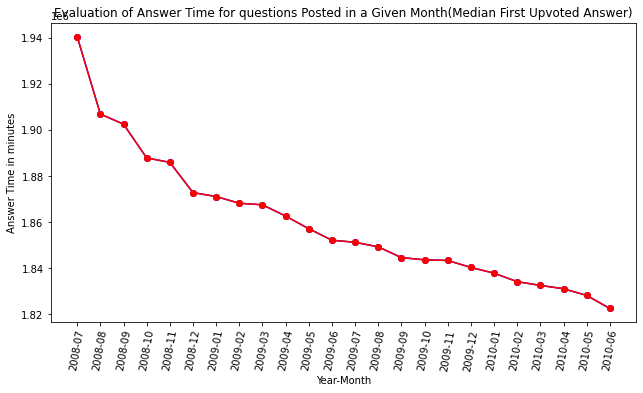

In [ ]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(10.5, 5.5)
plt.xticks(rotation=80)
plt.plot(x_axis,y_array,color='b',label='first answer',marker = 'o') 
#plt.plot(x_axis,y_array_1,color='r',label='first answer',marker = 'o')  
plt.title('Evaluation of Answer Time for questions Posted in a Given Month(Median First Upvoted Answer)')
plt.xlabel('Year-Month')
plt.ylabel('Answer Time in minutes')
plt.show()  